In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [21]:
# 1. İşlenmiş veriyi yükle
print("1. İşlenmiş veri yükleniyor...")
data_path = r"C:\\Users\\DangerClose\\Desktop\\Stack Overflow Q&A\\model_ready_sample.csv"
try:
    data = pd.read_csv(data_path)
    print(f"Veri başarıyla yüklendi. Boyut: {data.shape[0]} satır, {data.shape[1]} sütun")
except Exception as e:
    print(f"Veri yükleme hatası: {e}")
    exit()



1. İşlenmiş veri yükleniyor...
Veri başarıyla yüklendi. Boyut: 20000 satır, 35 sütun


In [22]:
# 2. Veri seti yapısı kontrolü
print("\n2. Veri seti yapısı:")
print(data.info())



2. Veri seti yapısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 20000 non-null  int64  
 1   OwnerUserId        19781 non-null  float64
 2   CreationDate       20000 non-null  object 
 3   ClosedDate         902 non-null    object 
 4   Score              20000 non-null  int64  
 5   Title              20000 non-null  object 
 6   Body               20000 non-null  object 
 7   clean_title        20000 non-null  object 
 8   processed_title    20000 non-null  object 
 9   clean_body         20000 non-null  object 
 10  processed_body     20000 non-null  object 
 11  Tag                20000 non-null  object 
 12  answers_text       17413 non-null  object 
 13  question_text      20000 non-null  object 
 14  complete_text      20000 non-null  object 
 15  tag_javascript     20000 non-null  int64  
 16  

In [23]:
# 3. Null değer kontrolü
print("\n3. Null değer kontrolü:")
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.any() > 0 else "Null değer yok")


3. Null değer kontrolü:
OwnerUserId       219
ClosedDate      19098
answers_text     2587
dtype: int64


In [24]:
# 4. Boş metin kontrolü
print("\n4. Boş metin kontrolü (complete_text):")
if 'complete_text' in data.columns:
    empty_text_count = (data['complete_text'].fillna('') == '').sum()
    print(f"Boş metin sayısı: {empty_text_count} ({empty_text_count/len(data)*100:.2f}%)")
    
    if empty_text_count > 0:
        print("\nBoş metinlerin ID'leri (ilk 5):")
        empty_ids = data[data['complete_text'].fillna('') == '']['Id'].head(5).tolist()
        print(empty_ids)
else:
    print("'complete_text' sütunu bulunamadı!")


4. Boş metin kontrolü (complete_text):
Boş metin sayısı: 0 (0.00%)



5. Etiket dağılımı kontrolü:
Toplam 20 etiket sütunu bulundu.

En popüler 10 etiket:
javascript: 1944 soru (9.72%)
java: 1885 soru (9.43%)
php: 1595 soru (7.98%)
c#: 1587 soru (7.94%)
android: 1458 soru (7.29%)
jquery: 1253 soru (6.26%)
python: 1039 soru (5.20%)
html: 934 soru (4.67%)
ios: 759 soru (3.79%)
c++: 707 soru (3.54%)

Hiç etiketi olmayan soru sayısı: 6405 (32.02%)

Soru başına ortalama etiket sayısı: 0.89
Maksimum etiket sayısı: 5


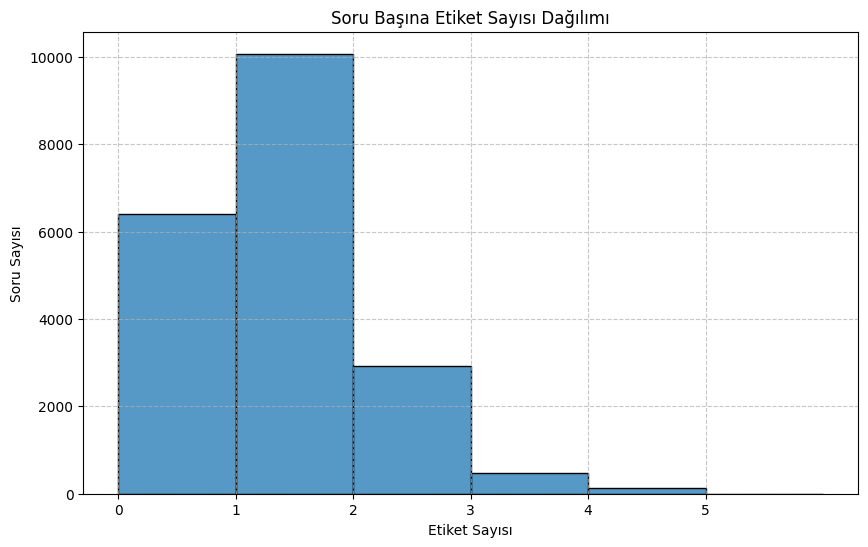

In [29]:
# 5. Etiket dağılımı kontrolü
print("\n5. Etiket dağılımı kontrolü:")
tag_columns = [col for col in data.columns if col.startswith('tag_')]
if tag_columns:
    print(f"Toplam {len(tag_columns)} etiket sütunu bulundu.")
    
    # Etiket başına soru sayısı
    tag_counts = data[tag_columns].sum().sort_values(ascending=False)
    print("\nEn popüler 10 etiket:")
    for tag, count in tag_counts.head(10).items():
        tag_name = tag.replace('tag_', '')
        print(f"{tag_name}: {count} soru ({count/len(data)*100:.2f}%)")
    
    # Hiç etiketi olmayan soru sayısı
    no_tag_count = (data[tag_columns].sum(axis=1) == 0).sum()
    print(f"\nHiç etiketi olmayan soru sayısı: {no_tag_count} ({no_tag_count/len(data)*100:.2f}%)")
    
    # Soru başına etiket sayısı
    tags_per_question = data[tag_columns].sum(axis=1)
    print(f"\nSoru başına ortalama etiket sayısı: {tags_per_question.mean():.2f}")
    print(f"Maksimum etiket sayısı: {tags_per_question.max()}")
    
    # Soru başına etiket sayısı dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(tags_per_question, bins=range(0, int(tags_per_question.max())+2))
    plt.title('Soru Başına Etiket Sayısı Dağılımı')
    plt.xlabel('Etiket Sayısı')
    plt.ylabel('Soru Sayısı')
    plt.xticks(range(0, int(tags_per_question.max())+1))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(os.path.join(os.path.dirname(data_path), 'tags_per_question.png'))
    plt.show()
else:
    print("Etiket sütunları bulunamadı!")



6. Metin uzunluğu kontrolü (complete_text):
Ortalama karakter sayısı: 1474.21
Ortalama kelime sayısı: 167.06
Minimum kelime sayısı: 9
Maksimum kelime sayısı: 3387


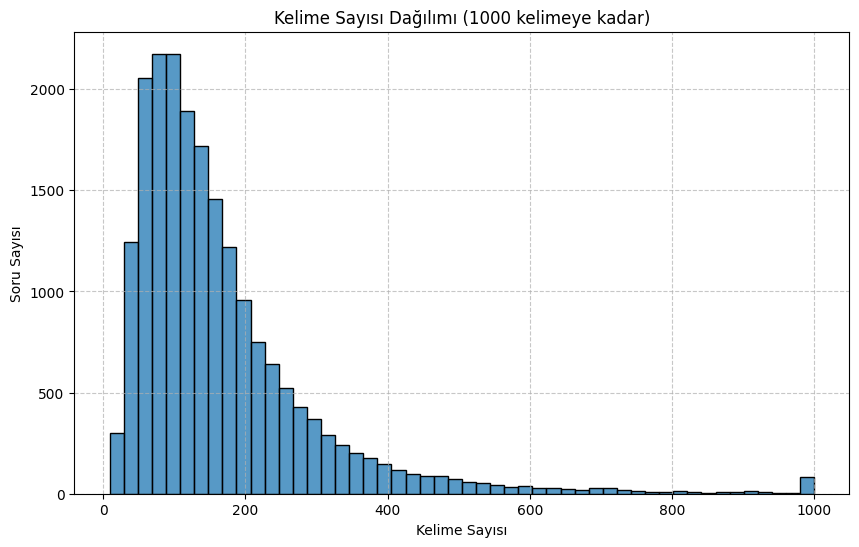


Çok kısa metin sayısı (<10 kelime): 1 (0.01%)

Çok kısa metin örneği:
ID: 16543250
Metin: 'init configuration object xml init object systemconfigurationconfiguration xml file '
Kelime sayısı: 9


In [30]:
# 6. Metin uzunluğu kontrolü
print("\n6. Metin uzunluğu kontrolü (complete_text):")
if 'complete_text' in data.columns:
    data['text_length'] = data['complete_text'].fillna('').apply(len)
    data['word_count'] = data['complete_text'].fillna('').apply(lambda x: len(x.split()))
    
    print(f"Ortalama karakter sayısı: {data['text_length'].mean():.2f}")
    print(f"Ortalama kelime sayısı: {data['word_count'].mean():.2f}")
    print(f"Minimum kelime sayısı: {data['word_count'].min()}")
    print(f"Maksimum kelime sayısı: {data['word_count'].max()}")
    
    # Kelime sayısı dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(data['word_count'].clip(upper=1000), bins=50)  # 1000'den büyük değerleri kısıtla
    plt.title('Kelime Sayısı Dağılımı (1000 kelimeye kadar)')
    plt.xlabel('Kelime Sayısı')
    plt.ylabel('Soru Sayısı')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(os.path.join(os.path.dirname(data_path), 'word_count_distribution.png'))
    plt.show()
    
    # Çok kısa metinleri kontrol et (10 kelimeden az)
    very_short_count = (data['word_count'] < 10).sum()
    print(f"\nÇok kısa metin sayısı (<10 kelime): {very_short_count} ({very_short_count/len(data)*100:.2f}%)")
    
    if very_short_count > 0:
        print("\nÇok kısa metin örneği:")
        very_short_example = data[data['word_count'] < 10].iloc[0]
        print(f"ID: {very_short_example['Id']}")
        print(f"Metin: '{very_short_example['complete_text']}'")
        print(f"Kelime sayısı: {very_short_example['word_count']}")
else:
    print("'complete_text' sütunu bulunamadı!")

In [31]:
# 7. Örnek bir soru göster
print("\n7. Rastgele bir soru örneği:")
sample_row = data.sample(1).iloc[0]
print(f"ID: {sample_row['Id']}")
if 'Title' in data.columns:
    print(f"Orijinal başlık: {sample_row['Title']}")
if 'clean_title' in data.columns:
    print(f"Temizlenmiş başlık: {sample_row['clean_title']}")
if 'complete_text' in data.columns:
    print(f"İşlenmiş metin (ilk 200 karakter): {sample_row['complete_text'][:200]}...")
if 'Tag' in data.columns:
    print(f"Etiketler: {sample_row['Tag']}")

print("\nİşlenmiş veri seti kontrolü tamamlandı!")


7. Rastgele bir soru örneği:
ID: 30647020
Orijinal başlık: How to get the local notifications which are listed in Notifications pull down?
Temizlenmiş başlık: How to get the local notifications which are listed in Notifications pull down?
İşlenmiş metin (ilk 200 karakter): get local notifications listed notifications pull down ios 80 application produces local notifications shown global notifications pull the notifications view perfect would like to get listed notificat...
Etiketler: ['ios']

İşlenmiş veri seti kontrolü tamamlandı!
